Connect with google drive, and copy the sample data.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# !cp -r drive/MyDrive/data/project_jl/. .

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Install and update libraries.

In [ ]:
!pip install scipy

In [ ]:
import pandas as pd
import numpy as np
# import yfinance as yf
# import scipy.optimize as sco
import warnings, csv
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [ ]:
spot_name = 'binance_book_snapshot_5_2025-05-22_BTCUSDT.csv.gz'
data_spot = pd.read_csv(spot_name, compression='gzip')
trade_name = 'merged_data.csv'
data_trade = pd.read_csv(trade_name)
swap_name = 'binance-futures_book_snapshot_5_2025-05-22_BTCUSDT.csv.gz'
data_swap = pd.read_csv(swap_name, compression='gzip')
display(data_spot.head(2))
display(data_swap.head(2))
# display(data_trade.head(2))

,exchange,symbol,timestamp,local_timestamp,asks[0].price,asks[0].amount,bids[0].price,bids[0].amount,asks[1].price,asks[1].amount,...,bids[2].price,bids[2].amount,asks[3].price,asks[3].amount,bids[3].price,bids[3].amount,asks[4].price,asks[4].amount,bids[4].price,bids[4].amount
0,binance,BTCUSDT,1747872000858313,1747872000858313,109669.91,5.07705,109669.9,0.78436,109671.24,1.16645,...,109669.88,0.00005,109672.1,0.79808,109669.87,0.00005,109672.11,0.00044,109669.66,0.00005
1,binance,BTCUSDT,1747872000914801,1747872000917321,109669.91,5.40374,109669.9,0.78436,109671.24,1.16645,...,109669.88,0.00005,109672.1,0.79808,109669.87,0.00005,109672.11,0.00044,109669.66,0.00005


,exchange,symbol,timestamp,local_timestamp,asks[0].price,asks[0].amount,bids[0].price,bids[0].amount,asks[1].price,asks[1].amount,...,bids[2].price,bids[2].amount,asks[3].price,asks[3].amount,bids[3].price,bids[3].amount,asks[4].price,asks[4].amount,bids[4].price,bids[4].amount
0,binance-futures,BTCUSDT,1747872000313000,1747872001005137,109609.6,1.293,109609.5,6.042,109609.7,0.001,...,109609.0,0.001,109610.0,0.001,109608.9,0.002,109610.1,0.001,109608.7,0.01
1,binance-futures,BTCUSDT,1747872003922000,1747872003924881,109609.6,1.293,109609.5,5.992,109609.7,0.001,...,109609.0,0.001,109610.0,0.001,109608.9,0.002,109610.1,0.001,109608.7,0.01


In [ ]:
df_spot = data_spot.copy()
df_trade = data_trade.copy()
df_swap = data_swap.copy()
df_spot['local_timestamp'] = pd.to_datetime(df_spot['local_timestamp'], unit='us', origin='unix')
df_swap['local_timestamp'] = pd.to_datetime(df_swap['local_timestamp'], unit='us', origin='unix')
df_spot = df_spot.set_index(pd.DatetimeIndex(df_spot['local_timestamp']))
df_swap = df_swap.set_index(pd.DatetimeIndex(df_swap['local_timestamp']))
display(df_swap.info())
display(df_spot.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1478857 entries, 2025-05-22 00:00:01.005137 to 2025-05-22 23:59:59.883376
Data columns (total 24 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   exchange         1478857 non-null  object        
 1   symbol           1478857 non-null  object        
 2   timestamp        1478857 non-null  int64         
 3   local_timestamp  1478857 non-null  datetime64[ns]
 4   asks[0].price    1478857 non-null  float64       
 5   asks[0].amount   1478857 non-null  float64       
 6   bids[0].price    1478857 non-null  float64       
 7   bids[0].amount   1478857 non-null  float64       
 8   asks[1].price    1478857 non-null  float64       
 9   asks[1].amount   1478857 non-null  float64       
 10  bids[1].price    1478857 non-null  float64       
 11  bids[1].amount   1478857 non-null  float64       
 12  asks[2].price    1478857 non-null  float64       
 13  asks[2].am

None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 779094 entries, 2025-05-22 00:00:00.858313 to 2025-05-22 23:59:59.916169
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   exchange         779094 non-null  object        
 1   symbol           779094 non-null  object        
 2   timestamp        779094 non-null  int64         
 3   local_timestamp  779094 non-null  datetime64[ns]
 4   asks[0].price    779094 non-null  float64       
 5   asks[0].amount   779094 non-null  float64       
 6   bids[0].price    779094 non-null  float64       
 7   bids[0].amount   779094 non-null  float64       
 8   asks[1].price    779094 non-null  float64       
 9   asks[1].amount   779094 non-null  float64       
 10  bids[1].price    779094 non-null  float64       
 11  bids[1].amount   779094 non-null  float64       
 12  asks[2].price    779094 non-null  float64       
 13  asks[2].amount   779094 no

None

In [ ]:
df_swap_qt = pd.DataFrame({
    'swap_bids': df_swap['bids[0].price'],
    'swap_asks': df_swap['asks[0].price']
})

df_spot_qt = pd.DataFrame({
    'spot_bids': df_spot['bids[0].price'],
    'spot_asks': df_spot['asks[0].price']
})
display(df_swap_qt.head())
display(df_spot_qt.head())

,swap_bids,swap_asks
local_timestamp,,
2025-05-22 00:00:01.005137,109609.5,109609.6
2025-05-22 00:00:03.924881,109609.5,109609.6
2025-05-22 00:00:04.852204,109613.9,109628.7
2025-05-22 00:00:04.901805,109630.2,109640.0
2025-05-22 00:00:04.953093,109637.1,109640.0


,spot_bids,spot_asks
local_timestamp,,
2025-05-22 00:00:00.858313,109669.9,109669.91
2025-05-22 00:00:00.917321,109669.9,109669.91
2025-05-22 00:00:01.018568,109669.9,109669.91
2025-05-22 00:00:01.117175,109669.9,109669.91
2025-05-22 00:00:01.217184,109669.9,109669.91


In [ ]:
# Resample df_spot_qt and df_swap_qt to a higher frequency (e.g., 1ms) to allow for finer matching
df_spot_qt_resampled = df_spot_qt.resample('10ms').ffill()
df_swap_qt_resampled = df_swap_qt.resample('10ms').ffill()

# Merge the resampled dataframes based on the closest time index within a tolerance
df_merged = pd.merge_asof(
    df_swap_qt_resampled['swap_bids'],
    df_spot_qt_resampled['spot_asks'],
    left_index=True,
    right_index=True,
    direction='nearest',
    tolerance=pd.Timedelta('100ms')
)

# Calculate the basis
df_basis = pd.DataFrame({
    'basis1': np.log(df_merged['swap_bids']) - np.log(df_merged['spot_asks'])
})
del df_merged
display(df_basis.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8639889 entries, 2025-05-22 00:00:01 to 2025-05-22 23:59:59.880000
Freq: 10ms
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   basis1  float64
dtypes: float64(1)
memory usage: 131.8 MB


None

In [ ]:
# Merge the resampled dataframes based on the closest time index within a tolerance
df_merged2 = pd.merge_asof(
    df_swap_qt_resampled['swap_asks'],
    df_spot_qt_resampled['spot_bids'],
    left_index=True,
    right_index=True,
    direction='nearest',
    tolerance=pd.Timedelta('100ms')
)

# Calculate the basis
df_basis2 = pd.DataFrame({
    'basis2': np.log(df_merged2['swap_asks']) - np.log(df_merged2['spot_bids'])
})

df_basis = df_basis.join(df_basis2)
del df_basis2
del df_merged2

In [ ]:
# df_basis = df_basis.join(df_basis2)
display(df_basis.head(5))

,basis1,basis2
local_timestamp,,
2025-05-22 00:00:01.000,NaN,NaN
2025-05-22 00:00:01.010,-0.000551,-0.00055
2025-05-22 00:00:01.020,-0.000551,-0.00055
2025-05-22 00:00:01.030,-0.000551,-0.00055
2025-05-22 00:00:01.040,-0.000551,-0.00055


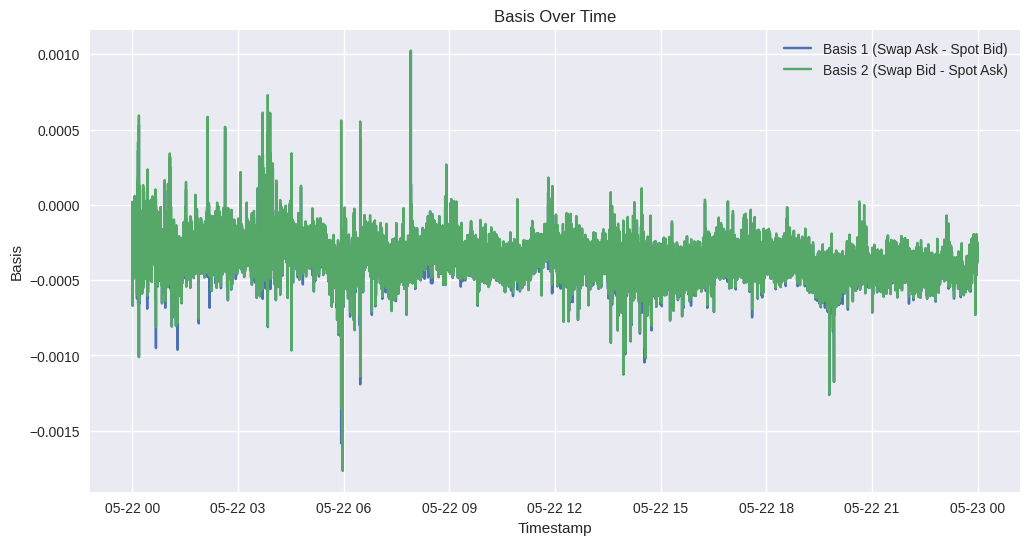

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_basis.index, df_basis['basis1'], label='Basis 1 (Swap Ask - Spot Bid)')
plt.plot(df_basis.index, df_basis['basis2'], label='Basis 2 (Swap Bid - Spot Ask)')
plt.title('Basis Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Basis')
plt.grid(True)
plt.legend()
plt.show()

# Task
Analyze trade data (`df_trade`).

## Display head and info

### Subtask:
Show the first few rows and the information about the columns in `df_trade` to get an initial understanding of the data.


**Reasoning**:
Display the first few rows and the information about the columns in `df_trade` to get an initial understanding of the data as instructed.



In [ ]:
display(df_trade.head())
display(df_trade.info())

,datetime,spot_symbol,swap_symbol,signal,spot_client_oid,swap_client_oid,threshold,expected_spot_price,expected_swap_price,expected_basis,...,end_calculate_ts,place_order_time,spot_wss_intime,spot_wss_outtime,swap_wss_intime,swap_wss_outtime,spot_order_time,spot_update_time,swap_order_time,swap_update_time
0,2025-10-01T13:54:54.538Z,ALPINE-USDT,ALPINEUSDTM,Close2,sc2CxaKEBAFz89K1DWyGu55Nc3Oas8w2,fc2CxaKEBAFz89K1DWyGu55Nc3Oas8w2,-0.00035,2.04500,2.04380,-0.000587,...,1759326894538,1759326894538,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12
1,2025-10-01T13:55:52.854Z,ALPINE-USDT,ALPINEUSDTM,Close2,sc2Gdzy62FO2w0emIIDZiL1M8vBPFasM,fc2Gdzy62FO2w0emIIDZiL1M8vBPFasM,-0.00035,2.05200,2.05120,-0.000390,...,1759326952853,1759326952854,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12
2,2025-10-01T13:55:52.881Z,ALPINE-USDT,ALPINEUSDTM,Close2,sc2iGMRaeFHFFGyDaLCRTmLRPPlZcEID,fc2iGMRaeFHFFGyDaLCRTmLRPPlZcEID,-0.00035,2.05200,2.05120,-0.000390,...,1759326952880,1759326952881,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12
3,2025-10-01T13:55:52.902Z,ALPINE-USDT,ALPINEUSDTM,Close2,sc2RLR2GqBIKkHNrYRLbVeR53gXHpCyl,fc2RLR2GqBIKkHNrYRLbVeR53gXHpCyl,-0.00035,2.05200,2.05120,-0.000390,...,1759326952901,1759326952902,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12
4,2025-10-01T13:56:41.186Z,AVNT-USDT,AVNTUSDTM,Open2,so2M92KJBDs4PnLqNkFzP2Rz12WLubWR,fo2M92KJBDs4PnLqNkFzP2Rz12WLubWR,-0.00054,1.26002,1.25966,-0.000286,...,1759327001186,1759327001186,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33814 entries, 0 to 33813
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             33814 non-null  object 
 1   spot_symbol          33814 non-null  object 
 2   swap_symbol          33814 non-null  object 
 3   signal               33807 non-null  object 
 4   spot_client_oid      33814 non-null  object 
 5   swap_client_oid      33814 non-null  object 
 6   threshold            33814 non-null  float64
 7   expected_spot_price  33814 non-null  float64
 8   expected_swap_price  33814 non-null  float64
 9   expected_basis       33814 non-null  float64
 10  expected_spot_size   33814 non-null  float64
 11  expected_swap_size   33814 non-null  int64  
 12  spot_executed_qty    33814 non-null  float64
 13  swap_executed_qty    33814 non-null  float64
 14  spot_avg_price       33814 non-null  float64
 15  swap_avg_price       33814 non-null 

None

## Display descriptive statistics

### Subtask:
Show summary statistics for numerical columns in `df_trade`.


**Reasoning**:
Calculate and display descriptive statistics for all numerical columns in `df_trade`.



In [ ]:
display(df_trade.describe())

,threshold,expected_spot_price,expected_swap_price,expected_basis,expected_spot_size,expected_swap_size,spot_executed_qty,swap_executed_qty,spot_avg_price,swap_avg_price,...,end_calculate_ts,place_order_time,spot_wss_intime,spot_wss_outtime,swap_wss_intime,swap_wss_outtime,spot_order_time,spot_update_time,swap_order_time,swap_update_time
count,33814.000000,33814.000000,33814.000000,33814.000000,3.381400e+04,33814.000000,3.381400e+04,33814.000000,33814.000000,33814.000000,...,3.381400e+04,3.381400e+04,3.381100e+04,3.381100e+04,3.381000e+04,3.381000e+04,3.380700e+04,3.380700e+04,2.904800e+04,2.904800e+04
mean,-0.000284,207.415422,207.352041,-0.000216,1.011123e+03,19.745845,1.011118e+03,16.664725,207.387428,187.236216,...,1.759743e+12,1.759743e+12,1.759743e+12,1.759743e+12,1.759743e+12,1.759743e+12,1.759743e+12,1.759743e+12,1.759799e+12,1.759799e+12
std,0.000970,2347.375403,2345.579815,0.001514,3.988432e+04,72.075105,3.988432e+04,66.216200,2347.376190,2345.616773,...,1.978508e+08,1.978508e+08,1.978563e+08,1.978563e+08,1.978540e+08,1.978540e+08,1.978677e+08,1.978677e+08,1.499412e+08,1.499412e+08
min,-0.010460,0.000010,0.000010,-0.015999,2.000000e-03,1.000000,0.000000e+00,0.000000,0.000000,0.000000,...,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12,1.759327e+12
25%,-0.000610,0.923825,0.920100,-0.000871,1.000000e-01,4.000000,1.000000e-01,3.000000,0.923600,0.183202,...,1.759602e+12,1.759602e+12,1.759602e+12,1.759602e+12,1.759602e+12,1.759602e+12,1.759602e+12,1.759602e+12,1.759680e+12,1.759680e+12
50%,-0.000210,133.319500,133.230000,0.000126,2.000000e-01,9.000000,2.000000e-01,6.000000,133.312425,16.451000,...,1.759806e+12,1.759806e+12,1.759806e+12,1.759806e+12,1.759806e+12,1.759806e+12,1.759806e+12,1.759806e+12,1.759842e+12,1.759842e+12
75%,0.000380,174.299000,174.352500,0.000646,1.200000e+01,14.000000,1.200000e+01,13.000000,174.299000,160.827500,...,1.759929e+12,1.759929e+12,1.759929e+12,1.759929e+12,1.759929e+12,1.759929e+12,1.759929e+12,1.759929e+12,1.759936e+12,1.759936e+12
max,0.003520,123263.200000,123168.000000,0.008857,4.680000e+06,6362.000000,4.680000e+06,6362.000000,123263.200000,123168.000000,...,1.759975e+12,1.759975e+12,1.759975e+12,1.759975e+12,1.759975e+12,1.759975e+12,1.759975e+12,1.759975e+12,1.759975e+12,1.759975e+12


In [ ]:
print(df_trade.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33814 entries, 0 to 33813
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             33814 non-null  object 
 1   spot_symbol          33814 non-null  object 
 2   swap_symbol          33814 non-null  object 
 3   signal               33807 non-null  object 
 4   spot_client_oid      33814 non-null  object 
 5   swap_client_oid      33814 non-null  object 
 6   threshold            33814 non-null  float64
 7   expected_spot_price  33814 non-null  float64
 8   expected_swap_price  33814 non-null  float64
 9   expected_basis       33814 non-null  float64
 10  expected_spot_size   33814 non-null  float64
 11  expected_swap_size   33814 non-null  int64  
 12  spot_executed_qty    33814 non-null  float64
 13  swap_executed_qty    33814 non-null  float64
 14  spot_avg_price       33814 non-null  float64
 15  swap_avg_price       33814 non-null 

## Explore unique values

### Subtask:
Check for unique values in categorical columns to understand the variety of data.


**Reasoning**:
Select object type columns and then calculate the number of unique values for each of these columns.



In [ ]:
object_columns = df_trade.select_dtypes(include='object').columns

for col in object_columns:
    unique_count = df_trade[col].nunique()
    print(f"Column '{col}': {unique_count} unique values")

Column 'datetime': 33794 unique values
Column 'spot_symbol': 96 unique values
Column 'swap_symbol': 96 unique values
Column 'signal': 2 unique values
Column 'spot_client_oid': 33814 unique values
Column 'swap_client_oid': 33814 unique values


## Check for missing values

### Subtask:
Identify if there are any missing values in `df_trade`.


**Reasoning**:
Check for missing values in the df_trade DataFrame and sum them for each column.



In [ ]:
missing_values = df_trade.isnull().sum()
display(missing_values)

,0
datetime,0
spot_symbol,0
swap_symbol,0
signal,7
spot_client_oid,0
swap_client_oid,0
threshold,0
expected_spot_price,0
expected_swap_price,0
expected_basis,0


## Visualize key distributions

### Subtask:
Create visualizations for relevant columns to understand their distributions.


**Reasoning**:
Create histograms for selected numerical columns and bar plots for selected categorical columns to visualize their distributions and frequencies.



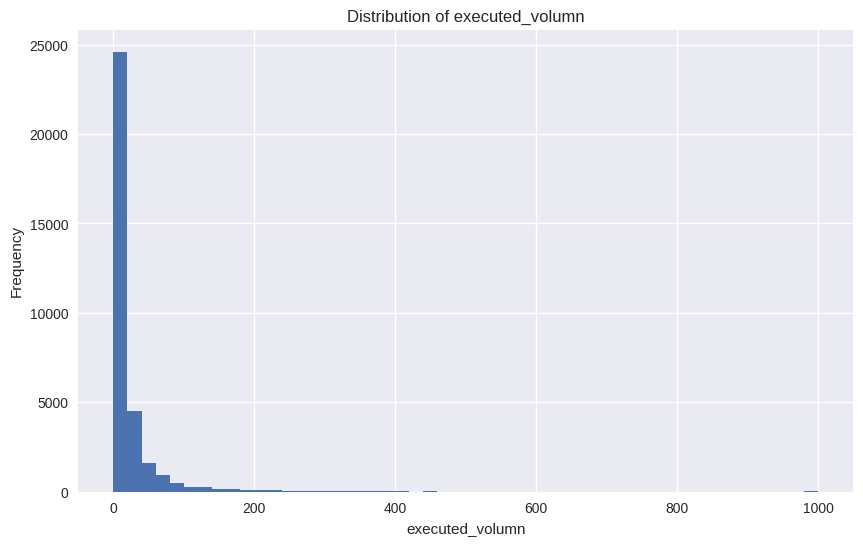

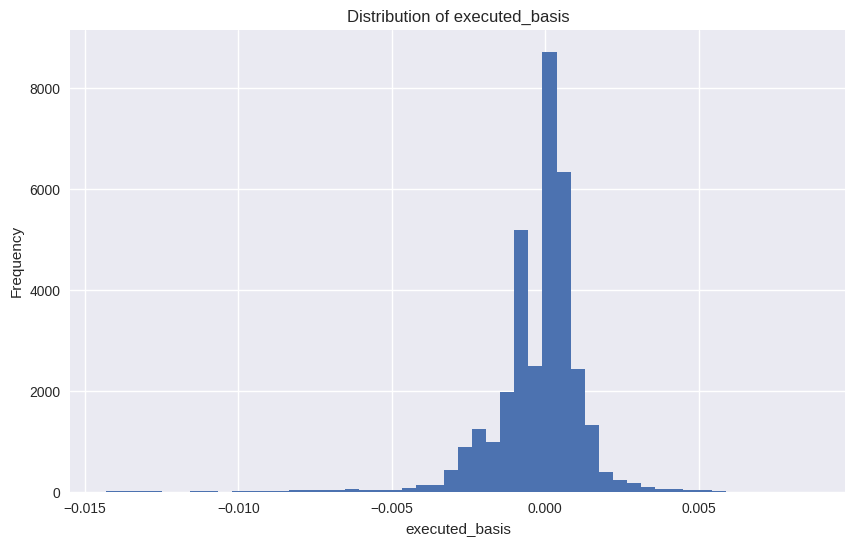

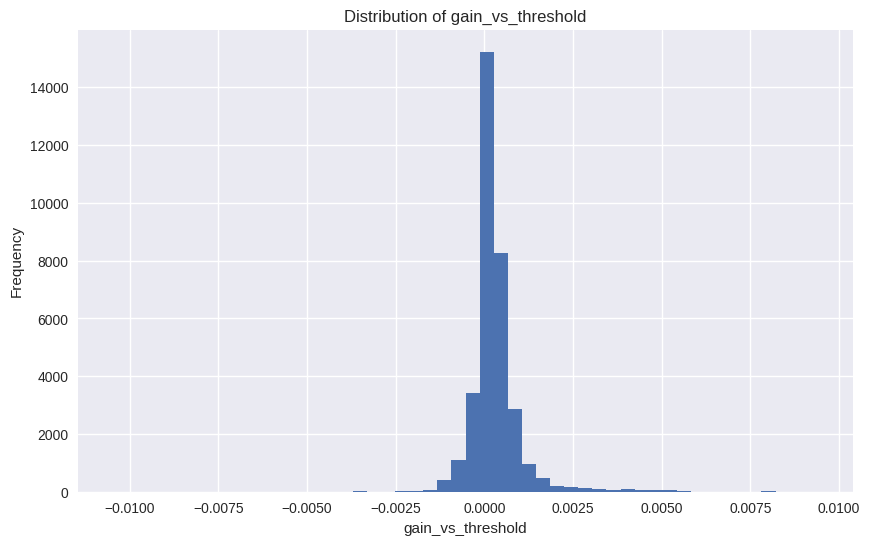

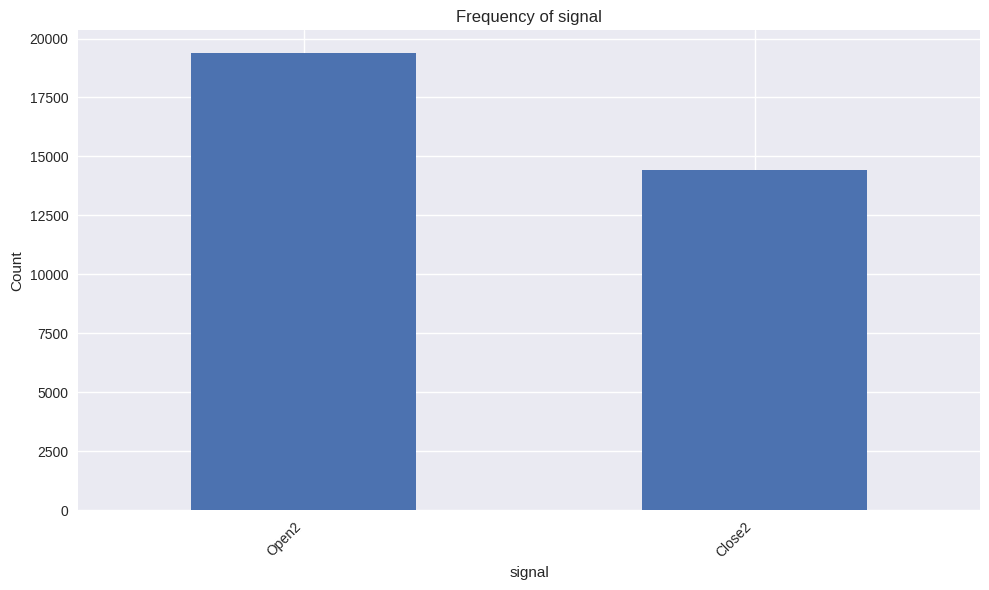

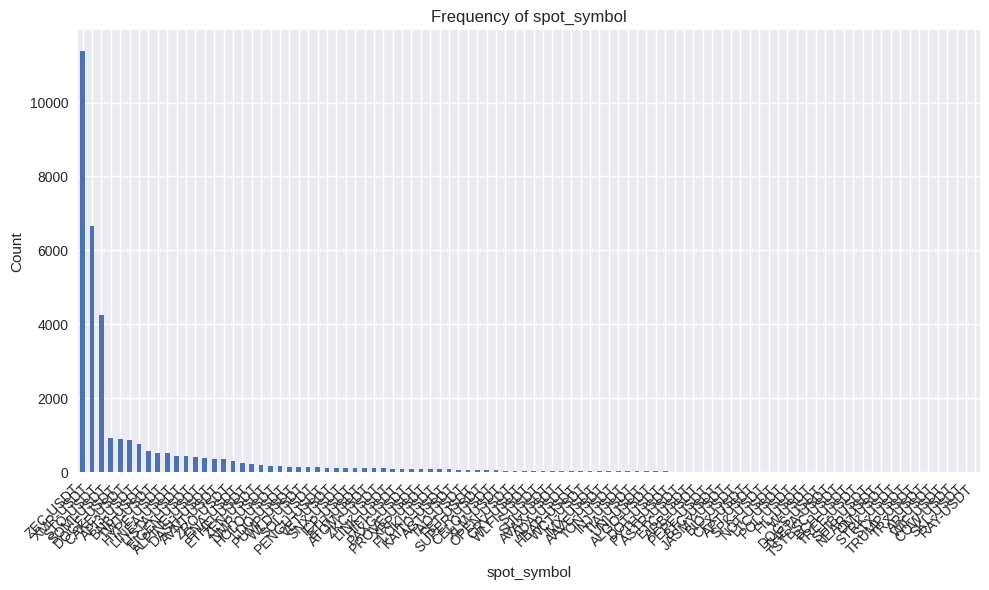

In [ ]:
# Select relevant numerical columns for visualization
numerical_cols = ['executed_volumn', 'executed_basis', 'gain_vs_threshold']

# Create histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    plt.hist(df_trade[col].dropna(), bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Select relevant categorical columns for visualization
categorical_cols = ['signal', 'spot_symbol']

# Create count plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    df_trade[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Summary:

### Data Analysis Key Findings

*   The `df_trade` DataFrame contains 33,814 entries and 34 columns with various data types.
*   Several columns have missing values, most notably `swap_order_time` and `swap_update_time` with 4766 missing entries each.
*   Columns like `datetime`, `spot_client_oid`, and `swap_client_oid` have a very high number of unique values, close to the total number of rows.
*   `spot_symbol` and `swap_symbol` have 96 unique values, likely representing trading pairs.
*   `signal` is a binary categorical column with 2 unique values.
*   Visualizations were successfully created for the distributions of `executed_volumn`, `executed_basis`, `gain_vs_threshold`, and the frequencies of `signal` and `spot_symbol`.

### Insights or Next Steps

*   Investigate the patterns and potential impact of the missing values in columns like `swap_order_time` and `swap_update_time`.
*   Further analyze the distributions of the numerical and categorical columns to identify any anomalies or significant trends in the trade data.
